# EDA of Student performance dataset
<i> <b> The goal of this EDA would not only be to find insights on the relationship between student grades and external factors but also how these external factors influence each other </b> </i>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Importing the dataset and analyzing it 
<ol>
  <li><b>Looking into all the unique columns and what they mean</b>
    <li><b>Facts about relavent columns</b></li>
</ol

In [2]:
student_df = pd.read_csv("student_data.csv")
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Looking into all the unique columns and what they mean

In [3]:
print(student_df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


#### Some facts about the row values of the dataset

* Gender - student's sex (binary: 'F' - female or 'M' - male)

* age - student's age (numeric: from 15 to 22)

* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* traveltime - home to school travel time (numeric: 1 - 1 hour)
* studytime - weekly study time (numeric: 1 - 10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject  (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)
* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

### Facts about important columns
1. School name: There is a clear uneven distribution in the schools from which the data is extracted from
2. Sex: There is a healthy distribution of both the sexes in the data. Female > Male in the data
3. Famsize: This data is imbalanced and does not take into consideration other factors like joint family
4. Parental status: Data is unbalanced, 89% together, 10% seperated
5. Guardians: most children have mothers as their guardians with 69% of mothers, 22% fathers and 8% others
6. Paid coaching:There is an almost equal distribution of students who seek tuition and who don't 45% and 54% respectively
7. Extra curricular activities: There's almost an equal distribution of students who do extra curricular activities (51%) and those who dont (49%)
8. Access to internet Over 83% of students have access to the internet which makes this data imbalanced, we will keep it to play around with it
9. Romantic relationships: This is a slightly imbalanced data but not that bad, around 33% of students are in a romantic relationship where as 66% are not.

### Writing a function to automate the column distribution analysis

In [4]:
def find_unique(col_name):
    unique_val_arr = student_df[col_name].unique()
    data = []
    label = []
    for i in unique_val_arr:
        count = student_df[col_name].where(student_df[col_name] == i).count()
        data.append(count)
        label.append(i)
    plt.figure(figsize =(5, 7))
    plt.pie(data,labels = label,autopct='%1.2f%%');
    plt.title(f"Distribution of elements in {col_name} column");
    plt.show()


#### 1) School Name

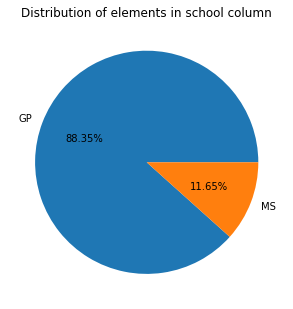

In [5]:
find_unique("school")

##### <i> As we can see, there is a clear uneven distribution in the schools from which the data is extracted from. We might drop this column as it might hinder our analysis </i>

#### 2) Sex

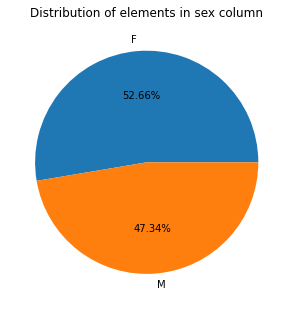

In [6]:
find_unique("sex")

##### <i> There is a healthy distribution of both the sexes in the data. The population of female is just slightly higher than male in the data </i>

#### 3. Family size

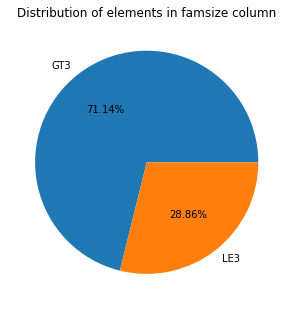

In [7]:
find_unique("famsize")

##### <i> This data is imbalanced and does not take into consideration other factors like joint family, guardians etc so we will not use this data for our analysis

#### 4. pstatus

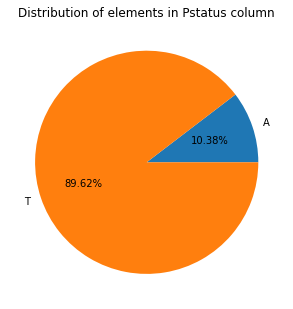

In [8]:
find_unique("Pstatus")

##### <I> Eventho there is an unbalanced distribution this column can help us give some insights on a students performance. So we will keep it and play around with it. Data is unbalanced, 89% together, 10% seperated.

#### 5. Guardian

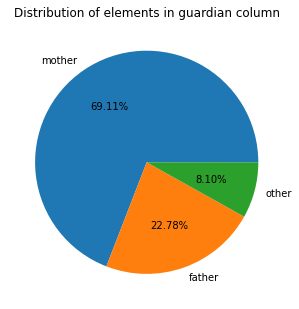

In [9]:
find_unique("guardian")

##### <I> As expected most children have mothers as their guardians with 69% of mothers, 22% fathers and 8% others

#### 6. Extra coaching classes

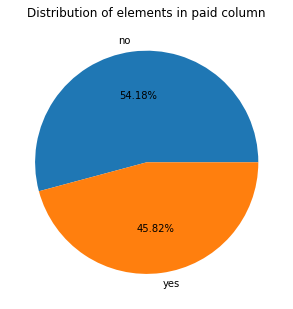

In [10]:
find_unique("paid")

#### <I>There is an almost equal distribution of students who seek tuition and who don't 45% and 54% respectively

#### 7. Extra curricular activities

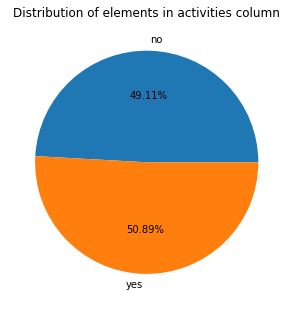

In [11]:
find_unique("activities")

#### <i> Again there's almost an equal distribution of students who do extra curricular activities (51%) and those who dont (49%)

#### 8. Access to internet

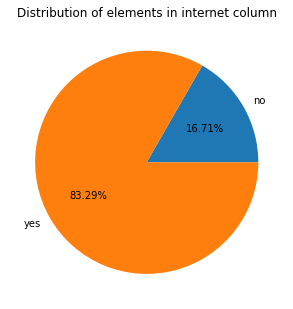

In [12]:
find_unique("internet")

#### <I> Over 83% of students have access to the internet which makes this data imbalanced, we will keep it to play around with it

#### 9. Romantic relationships

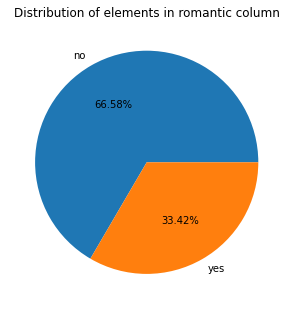

In [13]:
find_unique("romantic")

##### This is a slightly imbalanced data but not that bad, around 33% of students are in a romantic relationship where as 66% are not. However its not clear if this includes their past relationship or only their current so we will exclude this column

## Dropping unwanted columns 
After analyzing the columns and data lets drop all the unwanted columns due to reasons such as umbalanced data, inconsitencies about what the column is about etc

In [14]:
new_stud_df = student_df.drop(["school","address","famsize","Medu","Fedu","reason","traveltime","famsup","schoolsup","nursery","higher","Dalc","Walc","health","romantic"], axis = 1)

In [15]:
new_stud_df.sample(5)

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3
266,M,17,T,services,other,mother,2,0,yes,yes,yes,5,4,4,2,9,9,10
383,M,19,T,other,services,mother,1,1,no,no,no,4,3,2,0,6,5,0
113,M,15,T,teacher,other,mother,1,0,no,no,yes,3,5,2,10,18,19,19
82,F,15,T,services,other,mother,2,0,yes,no,yes,4,4,4,10,7,6,6
130,F,15,T,services,teacher,father,3,2,no,no,yes,4,2,2,0,12,0,0


## Renaming elements for better understanding

#### Renaming elements of pstatus. T = Together, A = apart  using the replace method

In [26]:
new_stud_df["Pstatus"].replace({"T":"Together","A":"Apart"},inplace=True)
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6,None
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6,None
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10,None
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15,None
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10,None


## Adding columns

### Working column
This column will designate which parent earns in the family 

<b>Finding all the unique elements in each column

In [33]:
print(new_stud_df["Mjob"].unique())
print(new_stud_df["Fjob"].unique())

['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']


<b>Using loc method to create column "working" and using conditional operators in it to identify which parent works and populating the column

In [29]:
new_stud_df.loc[(new_stud_df['Mjob'] != 'at_home') & (new_stud_df['Fjob'] != 'at_home'), 'working'] = 'Both' 
new_stud_df.loc[(new_stud_df["Mjob"] == "at_home") & (new_stud_df["Fjob"] != "at_home"), "working"] = "Father"
new_stud_df.loc[(new_stud_df["Mjob"] != "at_home") & (new_stud_df["Fjob"] == "at_home"), "working"] = "Mother"
new_stud_df.loc[(new_stud_df["Mjob"] == "at_home") & (new_stud_df["Fjob"] == "at_home"), "working"] = "None"

In [30]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6,Father
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6,Father
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10,Father
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15,Both
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10,Both


### Average grade columns

In [45]:
new_stud_df["avg_grade"] =( new_stud_df["G1"]+ new_stud_df["G2"]+ new_stud_df["G3"])/3

In [46]:
new_stud_df.head()

,sex,age,Pstatus,Mjob,Fjob,guardian,studytime,failures,paid,activities,internet,famrel,freetime,goout,absences,G1,G2,G3,working,avg_grade
0,F,18,Apart,at_home,teacher,mother,2,0,no,no,no,4,3,4,6,5,6,6,Father,5.666667
1,F,17,Together,at_home,other,father,2,0,no,no,yes,5,3,3,4,5,5,6,Father,5.333333
2,F,15,Together,at_home,other,mother,2,3,yes,no,yes,4,3,2,10,7,8,10,Father,8.333333
3,F,15,Together,health,services,mother,3,0,yes,yes,yes,3,2,2,2,15,14,15,Both,14.666667
4,F,16,Together,other,other,father,2,0,yes,no,no,4,3,2,4,6,10,10,Both,8.666667
